# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.375753e+01     1.649626e+01
 * time: 0.0029609203338623047
     1     6.272715e+01     8.555052e+00
 * time: 0.008764982223510742
     2     5.570901e+01     1.187942e+01
 * time: 0.08289790153503418
     3     3.931088e+01     8.362064e+00
 * time: 0.10185599327087402
     4     2.780437e+01     6.753763e+00
 * time: 0.1202230453491211
     5     1.878367e+01     4.936528e+00
 * time: 0.13617205619812012
     6     1.290361e+01     4.176897e+00
 * time: 0.15039300918579102
     7     1.059229e+01     6.953476e+00
 * time: 0.16129684448242188
     8     9.026110e+00     2.917054e+00
 * time: 0.17495989799499512
     9     8.120261e+00     4.372323e+00
 * time: 0.2206869125366211
    10     7.520194e+00     3.226837e+00
 * time: 0.23137402534484863
    11     6.891798e+00     1.973058e+00
 * time: 0.24198293685913086
    12     6.502909e+00     1.663825e+00
 * time: 0.252471923828125
    13     6.277446e+00     1.777546e+00
 * time: 

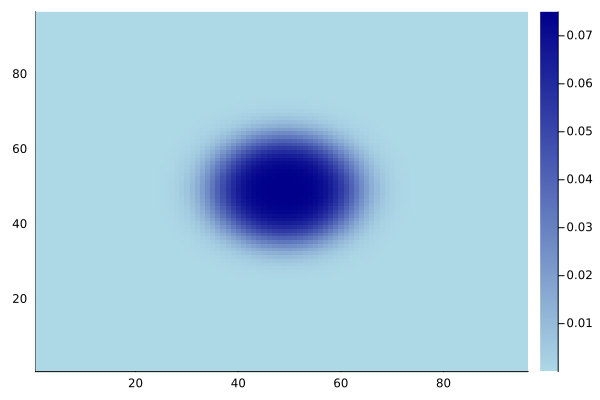

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)